###                                                                        Assignment 2

Question 1:  Different Clip limit.

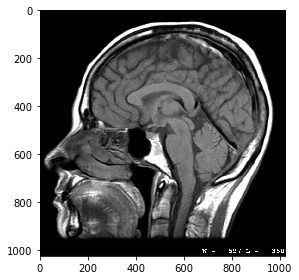

Original (8-bit encoding) the range is: 255


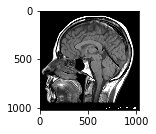

In [4]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#the simplest way to open and display an image uses the novice module from skimage
brainpic = novice.open('braincomplete.png')
brainpic.show()

#however, we will use instead the matplotlib image modules to obtain arrays that we can manipulate
#the 8-bit data in the PNG will be converted to floating point data between 0 and 1 by imread
#unless you ask it to Flatten=True
brainpicarray = mpimg.imread('braincomplete.png','True') 
print('Original (8-bit encoding) the range is: '+str(np.max(brainpicarray))) #showing max value in the image

bp=plt.subplot(221)
plt.imshow(brainpicarray)

We open the image in 8 bit and we can see the differnce in our picture; The given image have a very bright grey light and dark one. So, render this image we are going to use Historgram Equalization.
It will increase the contrast and transform the sharpness of our image.So we have two technique to do that 1. Histogram equalization 2.Adaptive Histogram equalization


Better techniques to modify the rendering of this images are as discussed in class manipulating the histogram, for instance, we can use a histogram equalization.So we are going to apply first  Histogram equalization.

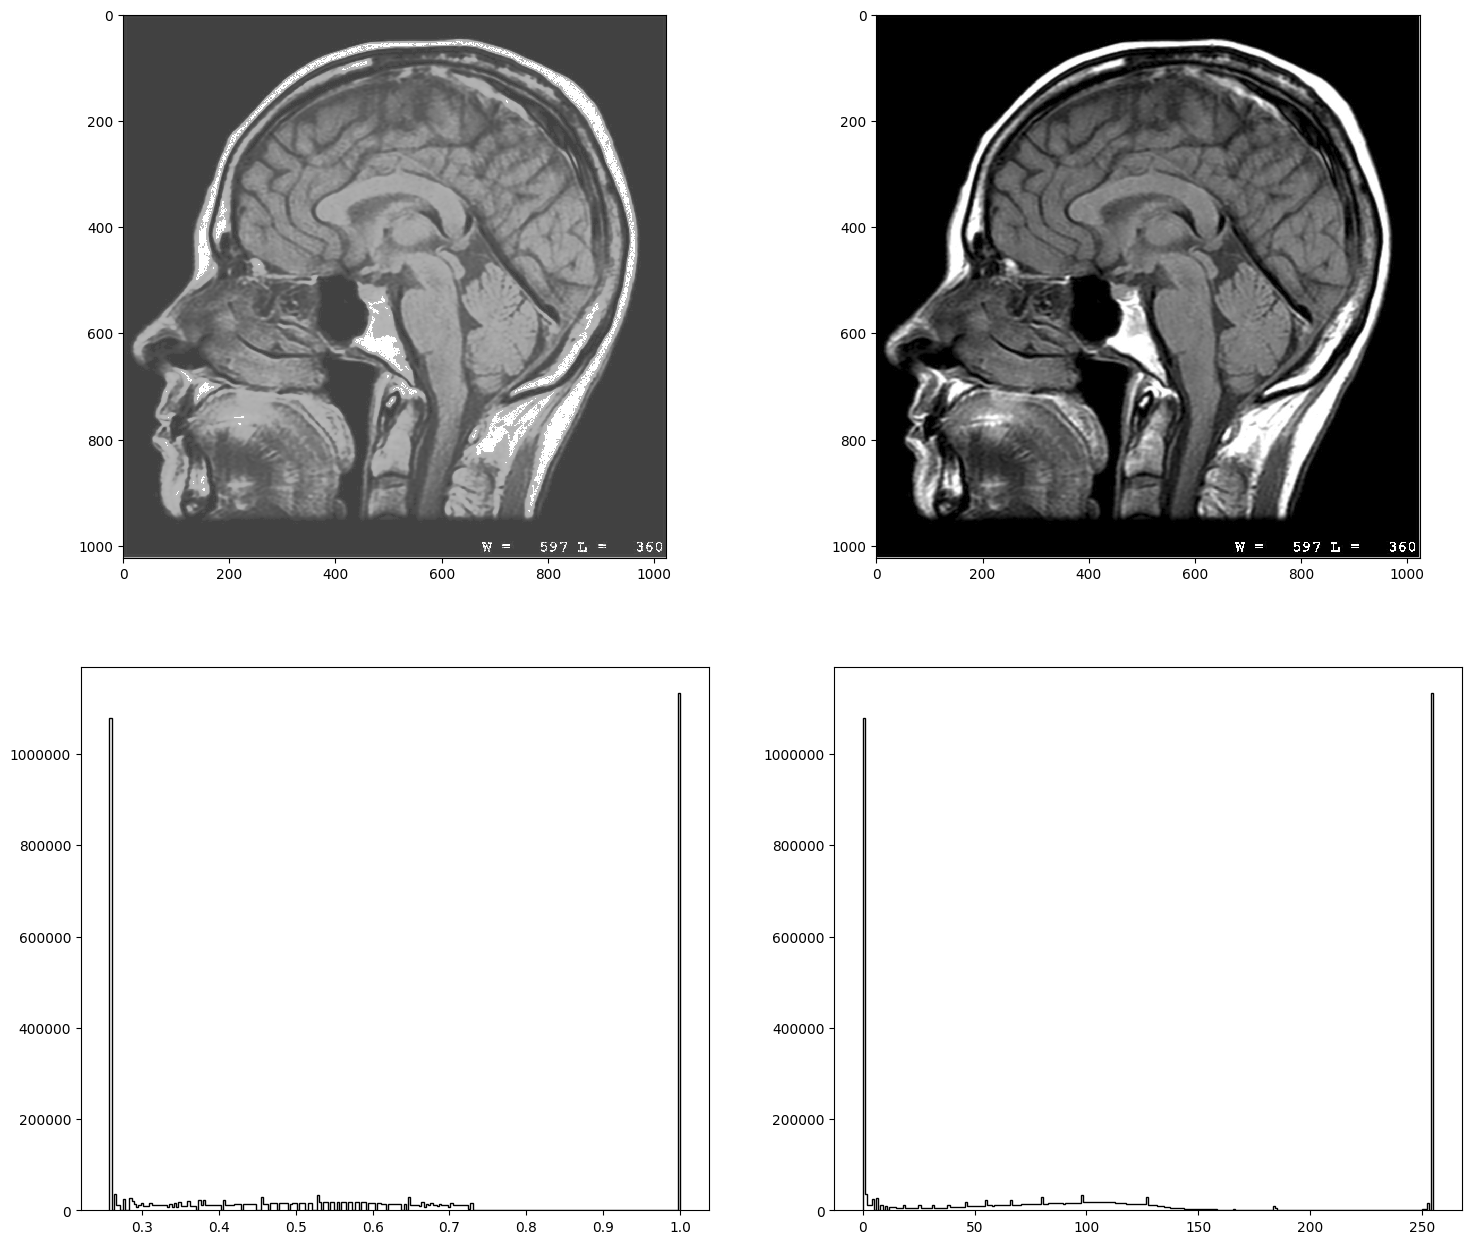

In [13]:
fig=plt.figure(figsize=(18, 16), dpi=99, facecolor='w', edgecolor='k')
img_eq = exposure.equalize_hist(brainpicarray)
plt.subplot(221)
plt.imshow(img_eq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(img_eq.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')


Or an equalization that takes the pixels in the percentiles 8% to 70% for the equalization.

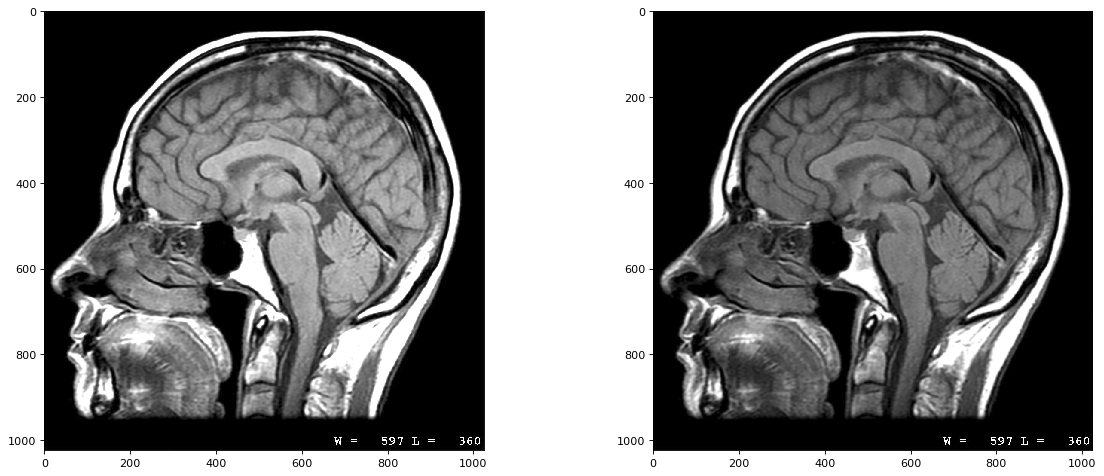

In [17]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
p2, p98 = np.percentile(brainpicarray, (5, 70))
img_eq2 = exposure.rescale_intensity(brainpicarray, in_range=(p2, p98))

plt.subplot(221)
plt.imshow(img_eq2)
plt.subplot(222)
plt.imshow(brainpicarray)



Or using an adaptive histogram equalization:- To see more enhancement in our image we used this technique. It divided the image into the small part and then enhance those part instead of inhanced the whole picture.
I'm going to use different clip limit.***normalized between 0 and 1 (higher values give more contrast).

###### Clip Limit

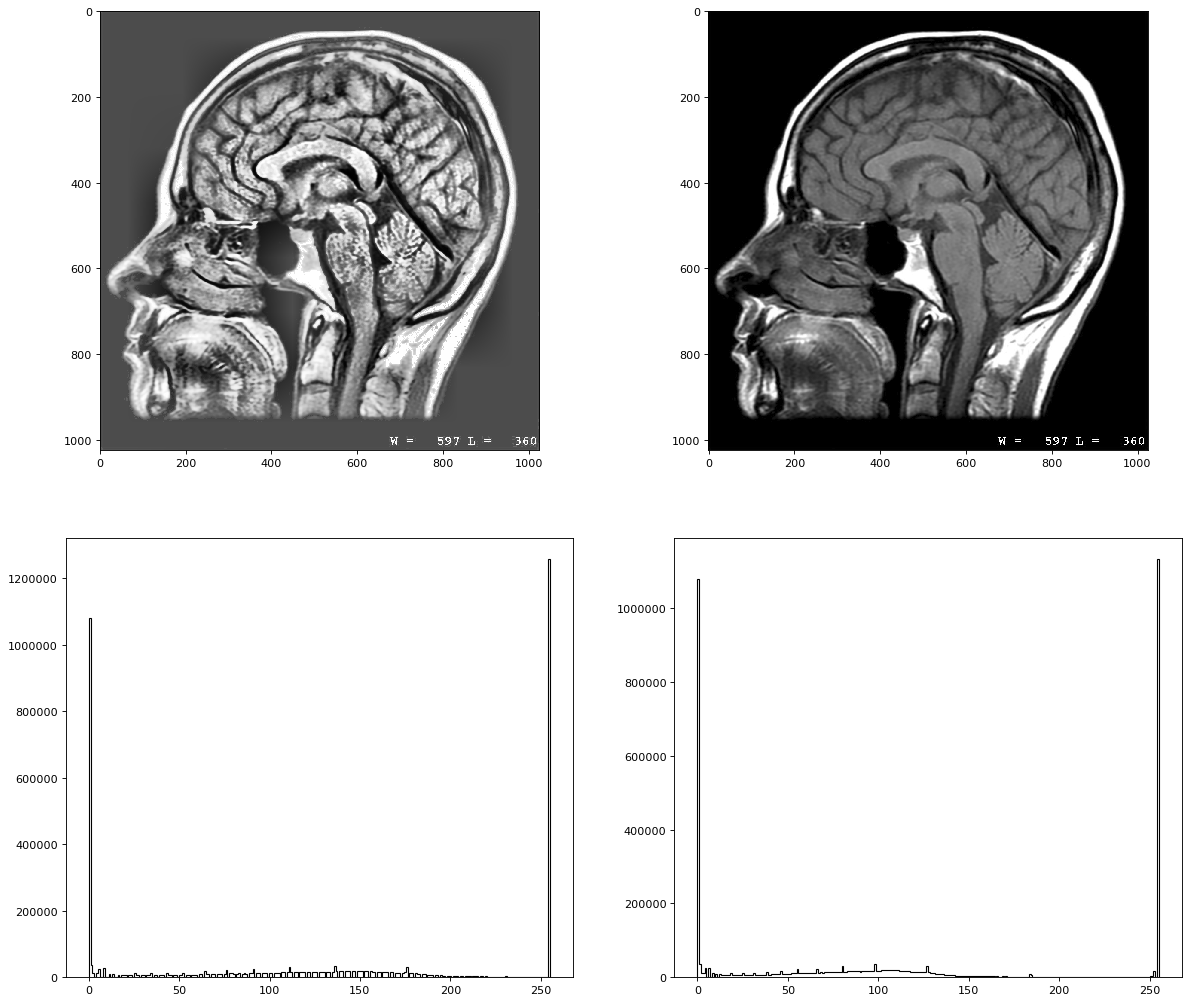

In [22]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.30)
plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(brainpicarray)
plt.subplot(223)
ht=plt.hist(img_eq2.ravel(), bins=256, histtype='step', color='black')
plt.subplot(224)
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')

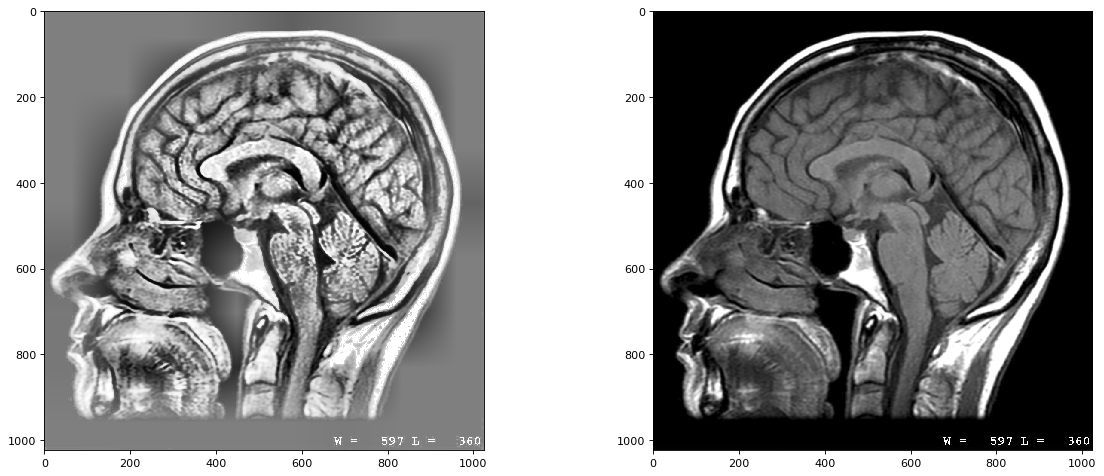

In [23]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.50)
plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(brainpicarray)

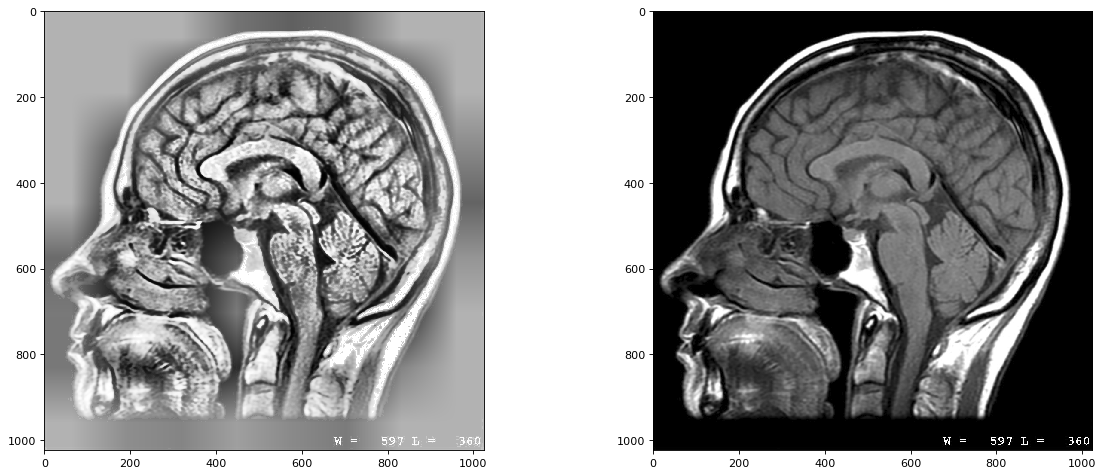

In [24]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.70)
plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(brainpicarray)

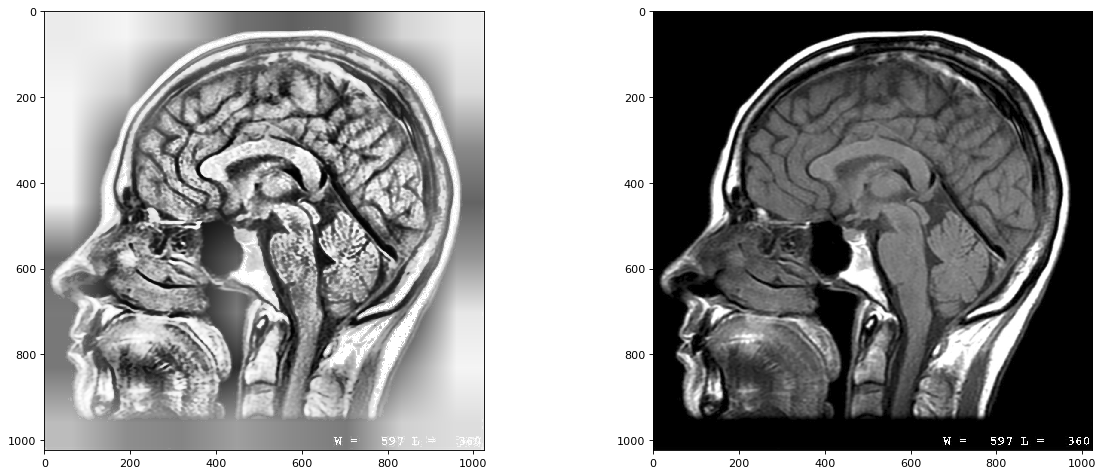

In [25]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.97)
plt.subplot(221)
plt.imshow(img_adapteq)
plt.subplot(222)
plt.imshow(brainpicarray)

###### Clip Limit
 ***As you can see After using the Adapative histogram equlization;our image is more clear is more than the histogram equlization.It is different than the ordinary histogram equalization in his contrast limitng. Using this scenerio we can say that Adapative histogram equlization is more better technique than histogram equlization. And we used clip limt to increase the contrast of out image and we can take this limit between 0 to 1. So, I used different clip limit and now you can see the difference in images that have differnet clip limits.It convert dark image into bright.

###### Question 2
Answer:- 
[2]**"Syntax"**: 
          
  **skimage.exposure.equalize_hist(image, nbins=256, mask=None)** "It return image after the histrogram                      equlization
   
[2]**"Parameters"**:    
1.image : array,Image array.
    
2.nbins : int, optional
        Number of bins for image histogram.sometime we ignored nbins for integer image because each interger have its own bin.
    
3.mask:   narray of bool or 0 and 1, optional       
       If array of same image as image.Than only point at which the mask==true are going to used for the qualization,which is applied to a whole image
                        
Returns:
   
   out : float array
          Image array after histogram equalization.
        
**"Explnation"**:  
              
   [5][4] We know that Contrast can be increase with using streaching of histogram.So, we can say that it  is a method used to improve the contrast of a image by straching out the intesity range.It adjust the image intensity to enhance contrast.It transform the gray level of a image.
  

###### Question 3
Answer:- 
[2]**"Syntax"**:
           
I have two syntax but there is no differece between in this two. I just feel to write down the both.
                     
 1.**skimage.exposure.equalize_adapthist(image, ntiles_x=8, ntiles_y=8, clip_limit=0.01, nbins=256)**
                     
 2.**skimage.exposure.equalize_adapthist(image,kernel_size=None, nbins=256)**
 
 It is Contrast Limited Adaptive Histogram Equalization (CLAHE)
                     
"Kernel_size:- Defines the shape of contextual regions used in the algorithm. If iterable is passed, it must          have the same number of elements as image.ndim (without color channel). If integer, it is                             broadcasted to each image dimension. By default, kernel_size is 1/8 of image height by 1/8 of                         its width."
                              
"(both ntile_x and ntile_y it is broadcasted to each image n-dimension)"
            
[2]**"Parameters"**:	
                  
   1.image : ndarray(array like)
             Input image.
   
   2.ntiles_x: Integer,optional
             Number of tile regions in the X direction. Ranges between 2 and 16.
   
   3.ntiles_y:Integer,optional
            Number of tile regions in the Y direction. Ranges between 2 and 16.
   
   4.clip_limit : float, optional
              Clipping limit, normalized between 0 and 1 (higher values give more contrast).
   
   5.nbins : int, optional
             Number of gray bins for histogram (“data range”).
            
Returns:	
         out :  ndarray
                Equalized image.
           
**"Explnation"**: 
                  
  [4][5]It introduces large changes in the gray level of image.Enhances the contrast of the grayscale image by transforming the values.In this technique divided the image into small regiona are called tiles rather than the entire image.Becasue of this our image is enhanced more as compare to it happen in other techniques.Each tile's contrast is enhanced, so that the histogram of the output region approximately matches the histogram specified by the 'Distribution' value. The neighboring tiles are then combined using bilinear interpolation to eliminate artificially induced boundaries.
                    
                   

###### Question 4:-
Answer:-[5][4]Adapative histogram equlization is work on the samll region in the image is called tiles while the histogram equlization is work on the entire image to improve the contrast of image. Adapative histogram equlization is more senstive to the noise but capable of enhancing subtle changes in the region for image processing purpose. While Histogram equalization work on the whole image to improve the contrast of image.Histogram equlization is less sensitiven noise but doesn't improve the contrast of subtle changes by much.So, Adapative histogram equalization is more useful to get the image of more complex part of our image like heart,brain etc(it give us the deapth knowleadge of the image.).While histogram equalization can used on image when the contrast of that image need improvement.
 
Adaptive histogram equalization is one more useful in the Notebook for you to notice details in the anatomy.It give us more detail of the anatomy.

In [ ]:
Biblography:-
    1. http://www.cs.unc.edu/~stc/FAQs/OpenCV/OpenCVReferenceManual.pdf
    
    2. http://www.realtimerendering.com/resources/GraphicsGems/
    
    3. http://www.cs.ukzn.ac.za/~sviriri/Books/Image-Processing/book4.pdf
    
    4. http://homepages.inf.ed.ac.uk/rbf/HIPR2/histeq.htm
    
    5. R. C. Gonzalez and R. E. Woods, Digital Image Processing, Third Edition, 2008.